# Introduction


**What?** Outer (cross) product - different implementations



# Theoretical recall


-  The outer product is the product between each ospsible element pairing from vector u and vector v.



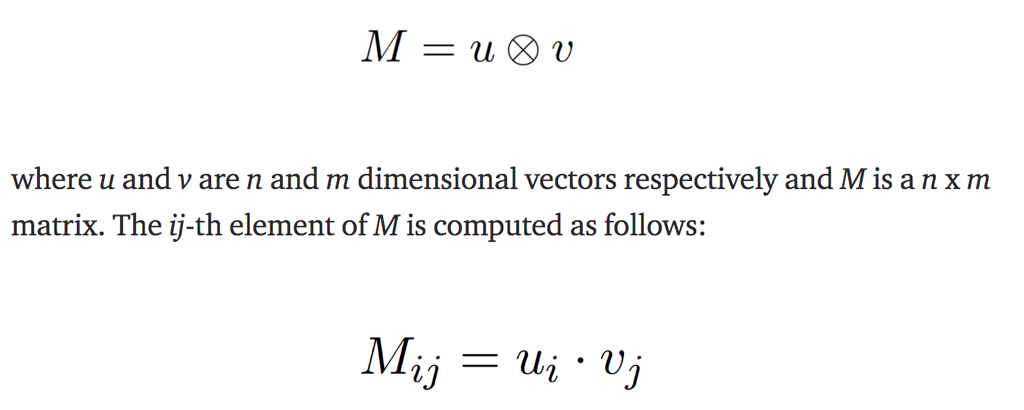

# Import modules

In [11]:
import numpy as np
from scipy.stats import uniform

# Simplest imlpementation


- Lists here rerpesent vector.
- Nested for loops are notoriously inefficient in Python.
- Generally frowned upon as not “Pythonic’’



In [1]:
u = [1,3,5,2,7,8,10]
v = [5,2,7,2,3,10,4]

M = []
for i in u:

    row = []
    for j in v:
        
        row.append(i * j)
    M.append(row)
print(M)

[[5, 2, 7, 2, 3, 10, 4], [15, 6, 21, 6, 9, 30, 12], [25, 10, 35, 10, 15, 50, 20], [10, 4, 14, 4, 6, 20, 8], [35, 14, 49, 14, 21, 70, 28], [40, 16, 56, 16, 24, 80, 32], [50, 20, 70, 20, 30, 100, 40]]


# Pythonic solution: list compprehensions


- Syntactically more efficient
- Will not give you a list of list but a list of length nxm
- It is algorithmically singificantly more efficient



In [2]:
u = [1,3,5,2,7,8,10]
v = [5,2,7,2,3,10,4]

M = [i * j for i in u for j in v]
print(M)

[5, 2, 7, 2, 3, 10, 4, 15, 6, 21, 6, 9, 30, 12, 25, 10, 35, 10, 15, 50, 20, 10, 4, 14, 4, 6, 20, 8, 35, 14, 49, 14, 21, 70, 28, 40, 16, 56, 16, 24, 80, 32, 50, 20, 70, 20, 30, 100, 40]


# Map() function


- Hardest to read
- Least efficient
- Though map() is generally a very efficient way of mapping a function over an iterable, here we have the problem of requiring a lot more memory. 
- To implement this method, we need to elongate iterables u and v by a factor of m and n, respectively. 
- This is especially wasteful, as these iterables are lists, which are highly memory intensive.
- Like list comprehension, this method returns a flat list, rather an array.



In [3]:
u = [1,3,5,2,7,8,10]
v = [5,2,7,2,3,10,4]

M = list(map(lambda i, j: i * j,
             [i for i in u for j in v],
             v*len(u)))
print(M)

[5, 2, 7, 2, 3, 10, 4, 15, 6, 21, 6, 9, 30, 12, 25, 10, 35, 10, 15, 50, 20, 10, 4, 14, 4, 6, 20, 8, 35, 14, 49, 14, 21, 70, 28, 40, 16, 56, 16, 24, 80, 32, 50, 20, 70, 20, 30, 100, 40]


# Numpy


- C-base vectorised outer product.
- Most efficient implementation.
- Returns a n-dimensional array.



In [8]:
import numpy as np

u = [1,3,5,2,7,8,10]
v = [5,2,7,2,3,10,4]

M = np.outer(u, v)
print(M.shape, type(M))
print(M)

(7, 7) <class 'numpy.ndarray'>
[[  5   2   7   2   3  10   4]
 [ 15   6  21   6   9  30  12]
 [ 25  10  35  10  15  50  20]
 [ 10   4  14   4   6  20   8]
 [ 35  14  49  14  21  70  28]
 [ 40  16  56  16  24  80  32]
 [ 50  20  70  20  30 100  40]]


# Comaprison

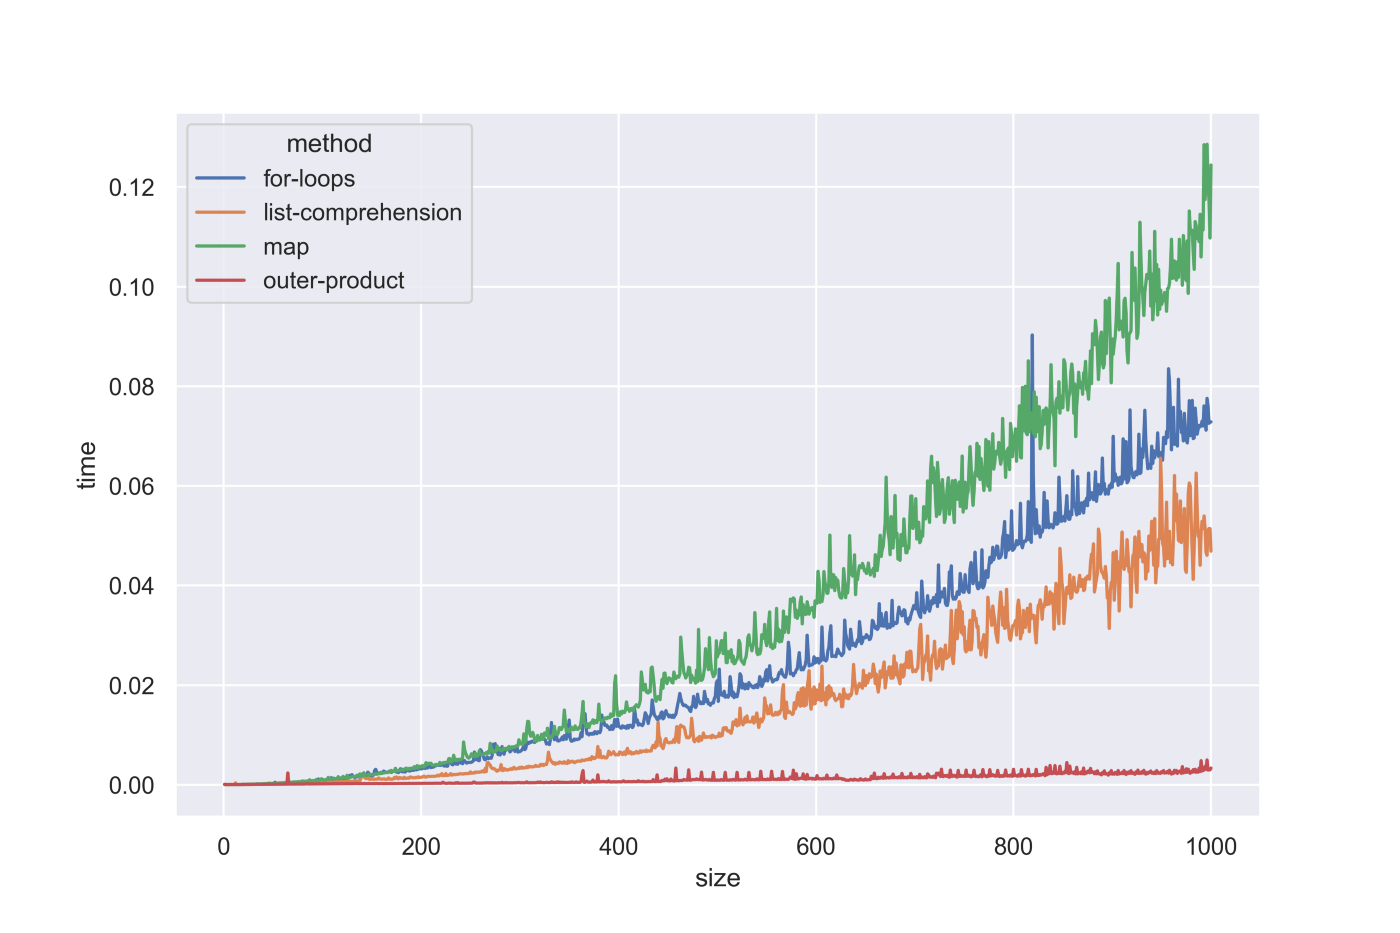

# Practical examlpe - tracelling saleman problem


- In the Travelling Salesman Problem (TSP) we are trying to find the **shortest possible** path to visit each city in a set exactly once, ending at the starting city.
- This can be solved via the Simulated Annealing algorithm.
- For this a pairwise distance matrix is required and this where the outer product is used.



In [13]:
n_cities = 500

# Generate random city coordsinates
coords = uniform.rvs(size=n_cities) + uniform.rvs(size=n_cities)*1j
coords[0]

(0.9217585064485053+0.550798043517782j)

In [10]:
def dist(a, b): # calculates distance between two points
    d = abs(a - b)
    return d
    
compute_dist = np.frompyfunc(dist, 2, 1) # vectorise distance function

D = compute_dist.outer(coords, coords).astype(np.float64)
print(D)
print(D.shape)

[[0.         0.30712657 0.11740409 ... 0.68165835 0.33842581 0.45184437]
 [0.30712657 0.         0.41187987 ... 0.83695576 0.52434108 0.64479138]
 [0.11740409 0.41187987 0.         ... 0.71472923 0.38216846 0.47941867]
 ...
 [0.68165835 0.83695576 0.71472923 ... 0.         0.34338485 0.2353484 ]
 [0.33842581 0.52434108 0.38216846 ... 0.34338485 0.         0.12167821]
 [0.45184437 0.64479138 0.47941867 ... 0.2353484  0.12167821 0.        ]]
(500, 500)



- I use **complex numbers** for the coordinate system. This has a few advantages, principally that I can store a coordinate as a singular element in an array; also, I get the euclidean distance between two points by taking their absolute difference
- I vectorise the distance function by using **np.frompyfunc()** 
- This is the crucial step in this approach. We can now use **ufunc** methods on this function, provided by NumPy
- One of these methods is .outer(), which we have seen before. It works as before, only that instead of a product of two numbers we will get the distance between two coordinates;



# Comparing inner, outer and Hadamard product btw vectors

In [4]:
u=[3,2,1]
v=[-1,0,1]
np.outer(u,v)

array([[-3,  0,  3],
       [-2,  0,  2],
       [-1,  0,  1]])

In [8]:
# element wise multilpication - Hadamard product
np.array(u)*np.array(v)

array([-3,  0,  1])

In [9]:
np.dot(u,v)

-2

# References


- [Reference code](https://towardsdatascience.com/outer-products-a-love-letter-b29a2c2c818e)



# Conclusion


- Outer product can be used to comute pair-wise distances.

